In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random

Average magnetization per spin =  -0.024
Average spin value of specfic point S[3][3] =  0.028
Average energy =  -0.072
[ 71.   0.  56.   0.  70.   0.  67.   0.  61.   0.  41.   0.  32.   0.  38.
   0.  23.   0.  17.   0.  19.   0.  14.   0.  12.   0.   4.   0.   4.   0.
   2.   0.   0.   0.   2.   0.   4.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.

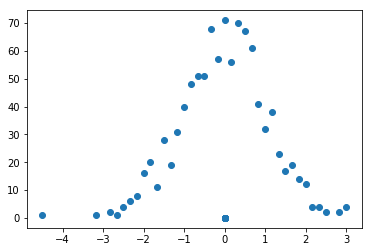

In [163]:
avg=0 #to store avg.(sum(S(i))/N)
N= 12 #length of lattice side 
P=np.zeros(1000) #to store probability distribution of magnetization
M=np.zeros(1000)
def repeat(N): #function to repeat process, taking the argument N, the lattice side length
    S=np.zeros((N,N)) #to store the spins of each point of the lattice
    global avgE #to store the average energy
    sumS=0 #to store the sum of S(i)s
    global avgS #to store the avg. value of a specific S(i), say S[3][3]
    for i in range(0,N):
        for j in range(0,N):
            S[i][j]=np.random.choice([-1,1]) #-1 or 1 spin assigned randomly to each point-->equal probability
            j+=1
        i+=1
    avgS+=S[3][3]
    for i in range(0,N):
        for j in range(0,N):
            sumS+=S[i][j]
    for i in range(0,N):
        for j in range(0,N):
            if j==N-1:
                if i==N-1:
                    avgE+=-((S[i][j]*S[0][j])+(S[i][j]*S[i][0]))
                else:
                    avgE+=-((S[i][j]*S[i+1][j])+(S[i][j]*S[i][0]))
            else:
                if i==N-1:
                    if j==N-1:
                        avgE+=-((S[i][j]*S[0][j])+(S[i][j]*S[i][0]))
                    else:
                        avgE+=-((S[i][j]*S[0][j])+(S[i][j]*S[i][j+1]))
                else:
                    avgE+=-((S[i][j]*S[i+1][j])+(S[i][j]*S[i][j+1]))
            j+=1
        i+=1
    m=int(sumS)
    P[m]+=1
    M[m]=sumS/N
    return sumS/N
avgS=0
avgE=0
for p in range(0,1000):
    avg+=repeat(N)
    p+=1
avg/=1000
avgS/=1000 
avgE/=1000
print("Average magnetization per spin = ",avg)
print("Average spin value of specfic point S[3][3] = ",avgS)
print("Average energy = ",avgE)
print(P)
plt.figure()
#plt.hist(P,bins=20) #redefine P array so that it can handle negative indices
plt.scatter(M,P) #close to a Gaussian distribution
#fit a Gaussian to this and find sigma^2 (variance) from this, then compare to analytically found variance

In [160]:
A = []
nnr = np.zeros(25)
nnl = np.zeros(25)
nnu = np.zeros(25)
nnd = np.zeros(25)
n = 5
s = np.zeros(25)

for i in range(0,25):
        s[i]=np.random.choice([-1,1])

for a in range(0,n):
    for b in range(0,n):
        I = a*n + b
        A.append(I)
        Ip = I + 1
        Im = I - 1
        Iu = I + n
        Id = I - n
        if b == n:
            Ip = I - n + 1
            nnr[I-1] = Ip
        if b == 0:
            Im = I + n - 1
            nnl[I-1] = Im
        if a == n:
            Iu = b
            nnu[I-1] = Iu
        if a == 0:
            Id = I + n*(n-1)  
            nnd[I-1] = Id
            
Esum = 0
Msum = 0

for c in range(0,24):
    d = nnr[c]
    e = nnl[c]
    f = nnu[c]
    g = nnd[c]
    for k in range(0,24): 
        Esum = Esum - s[k]*(s[d]+s[e]+s[f]+s[g])
        Msum = Msum + s[k]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices